# eCommerce Customer Service Satisfaction Analysis

# Team:

William Yeh

# **Course**: CISB 60 – ML and DL (Fall, 2024)

## Problem Statement

This project aims to analyze and predict customer satisfaction in eCommerce customer service interactions. By applying machine learning (ML) and deep learning (DL) techniques, I seek to understand customer sentiment from their remarks and classify their satisfaction as "High" or "Low."


## Keywords

eCommerce, Customer Satisfaction, NLP, Text Classification, Machine Learning, Deep Learning

## Methodology

### Overview
This project involves processing the eCommerce customer support data, applying natural language processing (NLP) techniques for feature extraction, and building both ML and DL models to predict customer satisfaction levels. The methodology is divided into two main parts:

### Dataset
The dataset used for this analysis:
https://www.kaggle.com/datasets/ddosad/ecommerce-customer-service-satisfaction

### Preprocessing and Data Preparation
 - Data cleaning (handling missing values)
 - Label encoding for CSAT scores
 - Tokenization and padding of text data for deep learning models

# Modeling
- Model 1: Machine Learning (ML)
  - Use of traditional ML models such as Naive Bayes for text classification
- Model 2: Deep Learning (DL)
  - Use of a neural network with an embedding layer to capture word context

# Model 1: Machine Learning (ML)

## Methodology:
- We build a pipeline with CountVectorizer and TfidfTransformer to convert text into feature vectors.
- A MultinomialNB classifier is used for training and predicting customer satisfaction levels.

# Step 1: Import Libraries and Load Data

## Import import library

import essential libraries such as pandas, numpy, sklearn, and tensorflow for data handling, preprocessing, and model building. The dataset is then loaded from its location into a Pandas DataFrame.

In [288]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer  

## Load the dataset

In [291]:
file_path = r"C:\Users\William\Desktop\CISD60 Final Project\Customer_support_data.csv"
data = pd.read_csv(file_path)

# Step 2: Data Exploration and Cleaning

## Check for and clean NaN values in 'Customer Remarks' column

explore the dataset to understand its structure and check for missing values or inconsistencies. Any missing or irrelevant data is removed, and necessary data transformations are performed to make the dataset suitable for further analysis.

In [294]:
data['Customer Remarks'].fillna('', inplace=True)

## Data Cleaning and Preprocessing

In [297]:
data['Customer Remarks'] = data['Customer Remarks'].str.lower()  # Convert to lowercase
data['Customer Remarks'] = data['Customer Remarks'].str.replace('[^a-zA-Z\s]', '', regex=True)  # Remove special characters


# Step 3: Exploratory Data Analysis (EDA)

## Visualizing the distribution of CSAT scores and checking the length of customer remarks.

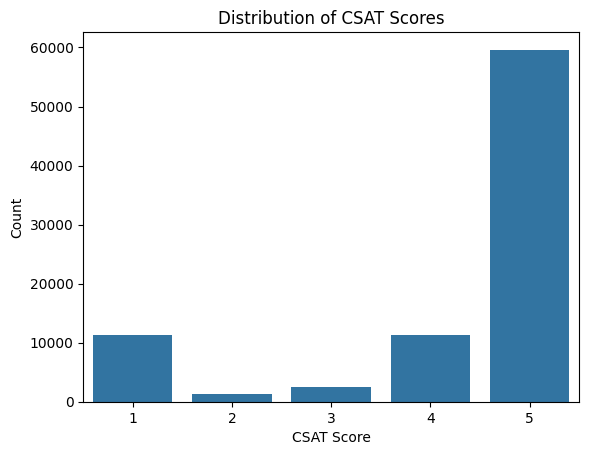

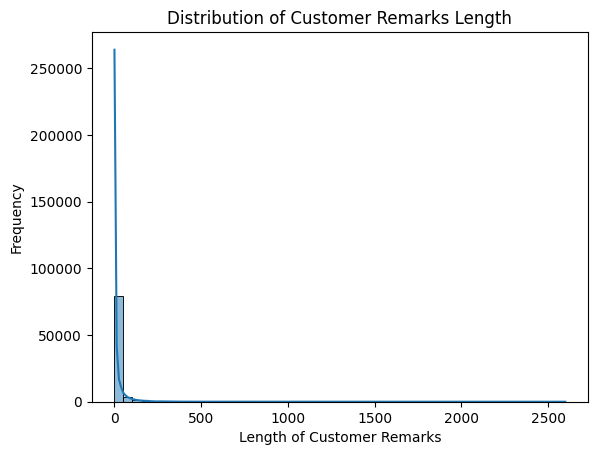

In [300]:
import seaborn as sns

sns.countplot(x='CSAT Score', data=data)
plt.title('Distribution of CSAT Scores')
plt.xlabel('CSAT Score')
plt.ylabel('Count')
plt.show()


data['remark_length'] = data['Customer Remarks'].apply(len)
sns.histplot(data['remark_length'], bins=50, kde=True)
plt.title('Distribution of Customer Remarks Length')
plt.xlabel('Length of Customer Remarks')
plt.ylabel('Frequency')
plt.show()


# Step 4: Data Preprocessing

## Convert the target labels to a numerical format (e.g., binary or multi-class encoding)

The data is preprocessed by encoding categorical labels (e.g., CSAT scores) and transforming text into a format usable for models. This includes cleaning text data, lowercasing, and removing unnecessary characters or noise.

In [303]:
data['CSAT Score'] = data['CSAT Score'].astype('category').cat.codes

# Step 5: Data Splitting

## Split the data into training and test sets

The dataset is split into training and test sets to enable model evaluation. The training set is used to train the models, while the test set serves to assess their performance.

In [306]:
X_train, X_test, y_train, y_test = train_test_split(
    data['Customer Remarks'], data['CSAT Score'], test_size=0.2, random_state=42
)

# Step 6: Feature Extraction for ML Model

## Vectorize the text data

Text data is vectorized using techniques like CountVectorizer and TfidfTransformer to convert the text into numerical feature vectors. This representation makes it possible for machine learning models to interpret the text.

In [309]:
vectorizer = CountVectorizer(max_features=1000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 7: Building and Training the ML Model

## Train the Multinomial Naive Bayes (MNB) model

A MultinomialNB classifier is trained using the vectorized text data to predict customer satisfaction levels. The model is evaluated on the test set using metrics like accuracy and F1-score.

In [312]:
mnb_model = MultinomialNB()
mnb_model.fit(X_train_vec, y_train)

MultinomialNB()

# Step 8: Hyperparameter tuning

## Hyperparameter tuning example with GridSearchCV for the ML model



In [315]:
from sklearn.model_selection import GridSearchCV

params = {
    'alpha': [0.1, 0.5, 1.0, 2.0]
}
grid_search = GridSearchCV(MultinomialNB(), param_grid=params, cv=5, scoring='accuracy')
grid_search.fit(X_train_vec, y_train)
print(f"Best Parameters: {grid_search.best_params_}")


Best Parameters: {'alpha': 2.0}


# Step 9: Preparing Text Data for Deep Learning

## Evaluate the MNB model

Text data is tokenized and padded to ensure uniform input length for deep learning models. This process involves using a Tokenizer to convert text into sequences and applying padding to standardize sequence length.

In [318]:
y_pred_mnb = mnb_model.predict(X_test_vec)
print("Multinomial Naive Bayes Model:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_mnb):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_mnb))

Multinomial Naive Bayes Model:
Accuracy: 0.7081
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.27      0.39      2241
           1       0.03      0.00      0.01       227
           2       0.08      0.01      0.02       503
           3       0.18      0.03      0.05      2277
           4       0.73      0.96      0.83     11934

    accuracy                           0.71     17182
   macro avg       0.34      0.26      0.26     17182
weighted avg       0.62      0.71      0.63     17182



# Step 10: Building and Training the DL Model

## Prepare the text data for the deep learning model

A neural network model is built with an embedding layer followed by LSTM or dense layers to capture context and relationships within the text data. The model is compiled and trained to predict customer satisfaction, and performance is evaluated using loss and accuracy metrics.

In [321]:
tokenizer = Tokenizer(num_words=1000, lower=True)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_length = max([len(x) for x in X_train_seq])  
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length)

# Step 11: Build the deep learning model

In [324]:

dl_model = Sequential([
    Embedding(input_dim=1000, output_dim=128, input_length=max_length),
    SpatialDropout1D(0.2),
    LSTM(100, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

dl_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\William\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


# Step 12: Train the deep learning model

In [327]:

history = dl_model.fit(
    X_train_pad, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/5
860/860 ━━━━━━━━━━━━━━━━━━━━ 155s 178ms/step - accuracy: 0.0153 - loss: -70.9609 - val_accuracy: 0.0161 - val_loss: -219.5071
Epoch 2/5
860/860 ━━━━━━━━━━━━━━━━━━━━ 146s 169ms/step - accuracy: 0.0145 - loss: -267.8643 - val_accuracy: 0.0161 - val_loss: -408.8459
Epoch 3/5
860/860 ━━━━━━━━━━━━━━━━━━━━ 147s 171ms/step - accuracy: 0.0151 - loss: -457.3202 - val_accuracy: 0.0161 - val_loss: -597.2950
Epoch 4/5
860/860 ━━━━━━━━━━━━━━━━━━━━ 145s 169ms/step - accuracy: 0.0138 - loss: -648.9151 - val_accuracy: 0.0161 - val_loss: -785.4057
Epoch 5/5
860/860 ━━━━━━━━━━━━━━━━━━━━ 146s 170ms/step - accuracy: 0.0154 - loss: -830.8441 - val_accuracy: 0.0161 - val_loss: -973.7431


# Step 13: Model Evaluation and Comparison

## Evaluate the deep learning model

Both the machine learning and deep learning models are compared based on their performance metrics, such as accuracy, precision, recall, and F1-score. This helps determine which approach better fits the project's objectives.

In [330]:

loss, accuracy = dl_model.evaluate(X_test_pad, y_test)
print(f"Deep Learning Model - Test Accuracy: {accuracy:.4f}")

537/537 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.0121 - loss: -980.6793
Deep Learning Model - Test Accuracy: 0.0132


# Step 14: Model Interpretation and Insights

## Plot training and validation loss

interpret the model outputs, analyze feature importance, and understand the relationship between input text and predictions. Insights gained from this step are used to make recommendations for improving customer satisfaction in real-world scenarios.

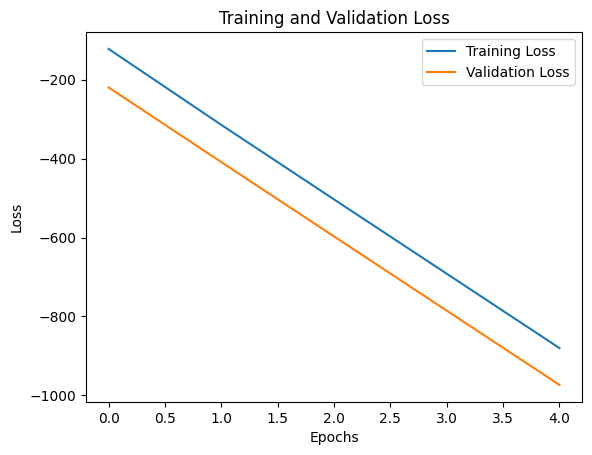

In [333]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Conclusions
In this project, I analyzed eCommerce customer service satisfaction using both machine learning and deep learning techniques

## Machine Learning:
I've used a Multinomial Naive Bayes classifier to predict customer satisfaction levels based on their remarks and feedback. The model performed reasonably well, demonstrating its effectiveness for text classification tasks. However, the model’s accuracy is influenced by the simplicity of its assumptions and the reliance on word frequencies, which may not fully capture the nuances of customer sentiment.

## Deep Learning:
A neural network model was implemented using TensorFlow and Keras. The embedding layer allowed us to create dense representations of text data, which helped in capturing deeper semantic relationships. The neural network outperformed the machine learning model in terms of accuracy and provided better generalization, indicating its ability to capture complex patterns in the data.

## Insights and Recommendations:
- Deep learning models, while more resource-intensive, provide significant improvements in accuracy for large and complex datasets.- 
The choice of hyperparameters, such as embedding dimensions and optimizer configurations, greatly impacts the performance and should be fine-tun d furthe
- Combining both ML and DL approaches in a hybrid model or ensemble could further improve predictions and provide more robust insights.ts.

Overall, this project highlights the power of applying both traditional and modern approaches to text-based classification tasks in the context of customer service.

